# Effect of Zero-padding and Windowing on FFT

In [1]:
# import necessary packages and modules
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create helper function to print out expected and calculated frequency of signal
def print_freq(expected, freq, mag):
    print("Expected Frequency: ", expected)
    calculated_freq = freq[np.argmax(mag)]
    print("Calculated Frequency: ", calculated_freq)

## Create a sine wave

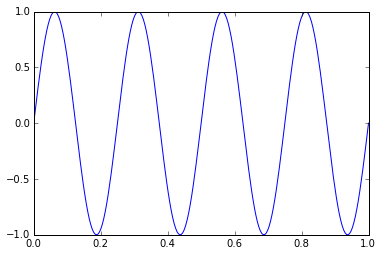

In [3]:
%matplotlib inline

freq = 4
pts = 230
x = np.linspace(0,1,pts)
sine = np.sin(x*freq*2*np.pi)

plt.plot(x,sine)
plt.show()

Here we will see the result of the FFT of this signal without windowing or zero padding. The real FFT will be better for inspection since this signal is real and the negative frequencies are redundant.

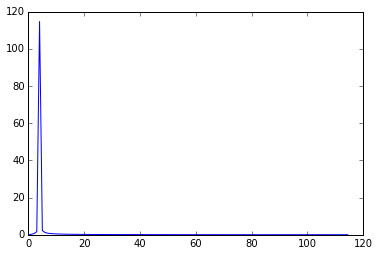

Expected Frequency:  4
Calculated Frequency:  3.98260869565


In [4]:
timestep = x[1] - x[0]

magnitude = abs(np.fft.rfft(sine))
frequencies = np.fft.rfftfreq(sine.size,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## Lets take the FFT of the signal with zero-padding to the next power of two.

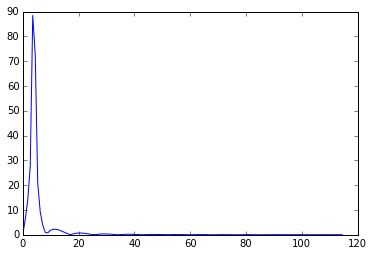

Expected Frequency:  4
Calculated Frequency:  3.578125


In [5]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** N
magnitude = abs(np.fft.rfft(sine, n=pad_len))
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## Now lets zero pad to the next plus one power of two.

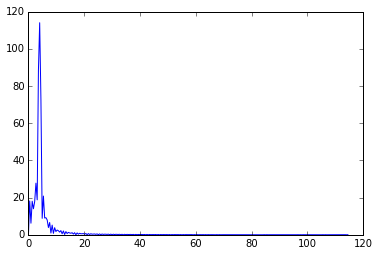

Expected Frequency:  4
Calculated Frequency:  4.025390625


In [6]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** (N + 1)
magnitude = abs(np.fft.rfft(sine, n=pad_len))
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## Here we will see the effect on the FFT when you multiply the signal by a window function (Hann in this case).

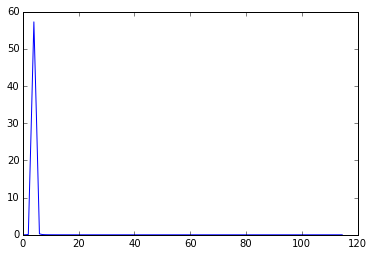

Expected Frequency:  4
Calculated Frequency:  3.98260869565


In [7]:
window = signal.hann(sine.size)
magnitude = abs(np.fft.rfft(sine * window))
frequencies = np.fft.rfftfreq(sine.size,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## Now lets use a window with zero padding. 

We will zero pad to the next plus one power of two, to avoid circular convolution.

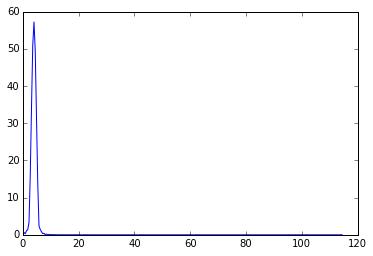

Expected Frequency:  4
Calculated Frequency:  4.025390625


In [8]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** (N + 1)
window = signal.hann(sine.size)
magnitude = abs(np.fft.rfft(sine * window, n=pad_len))
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

# More interesting will be to see the effect of windowing and zero padding when random Gaussian noise is added to the signal.

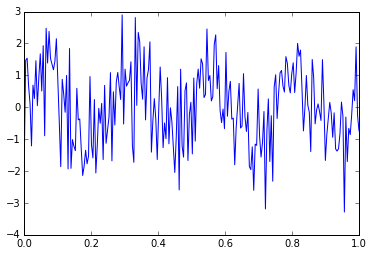

In [9]:
freq = 4
pts = 230
x = np.linspace(0,1,pts)
noise = np.random.randn(pts)
sine = np.sin(x*freq*2*np.pi) + noise

plt.plot(x,sine)
plt.show()

## No zero-padding or windowing FFT

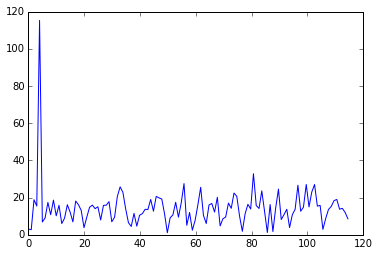

Expected Frequency:  4
Calculated Frequency:  3.98260869565


In [10]:
timestep = x[1] - x[0]

magnitude = abs(np.fft.rfft(sine))
frequencies = np.fft.rfftfreq(sine.size,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## With zero-padding and windowing

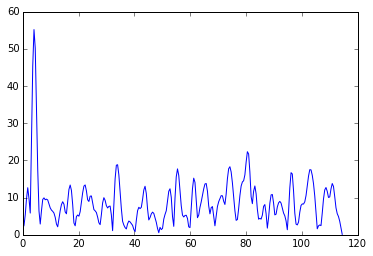

Expected Frequency:  4
Calculated Frequency:  4.025390625


In [11]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** (N + 1)
window = signal.hann(sine.size)
magnitude = abs(np.fft.rfft(sine * window, n=pad_len))
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_freq(freq, frequencies, magnitude)

## Lets see the effect when the effect on the FFT with a linear combination of two sinusoids with noise

First lets make a new print function that will find the two frequencies with the largest magnitude.

In [12]:
def print_two_freqs(exptd, freq, mag): 
    rel_max = signal.argrelmax(mag)[0]
    sort_mag_rel_max = np.argsort(mag[rel_max])[::-1]
    calc_f1, calc_f2 = freq[rel_max[sort_mag_rel_max]][:2]
    print("Expected Frequencies: {}, {}".format(exptd[0],exptd[1]))
    print("Calculated Frequencies: {}, {}".format(calc_f1, calc_f2))

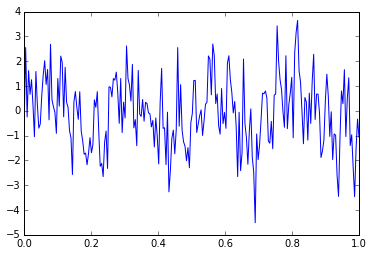

In [13]:
freq_1 = 4
freq_2 = 20
pts = 230
x = np.linspace(0,1,pts)
noise = np.random.randn(pts)
sine = np.sin(x*freq_1*2*np.pi) + np.sin(x*freq_2*2*np.pi) + noise

plt.plot(x,sine)
plt.show()

## No zero-padding or windowing FFT

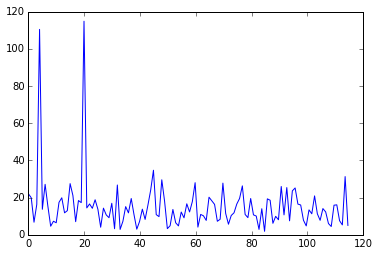

Expected Frequencies: 4, 20
Calculated Frequencies: 19.91304347826087, 3.9826086956521745


In [14]:
magnitude = abs(np.fft.rfft(sine))
frequencies = np.fft.rfftfreq(sine.size,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_two_freqs((freq_1,freq_2), frequencies, magnitude)

## With zero-padding and windowing

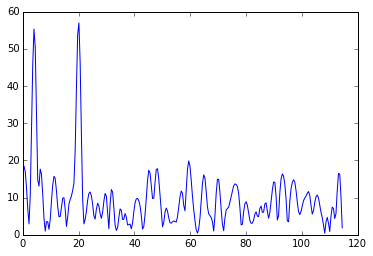

Expected Frequencies: 4, 20
Calculated Frequencies: 20.126953125, 4.025390625


In [15]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** (N + 1)
window = signal.hann(sine.size)
magnitude = abs(np.fft.rfft(sine * window, n=pad_len))
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_two_freqs((freq_1,freq_2), frequencies, magnitude)

## Lets see the Power Spectral Density (PSD) of the above random signal with no zero-padding or windowing. Since it is a real signal we can just take the magnitude of the FFT pointwise multiplied with itself to get the PSD.

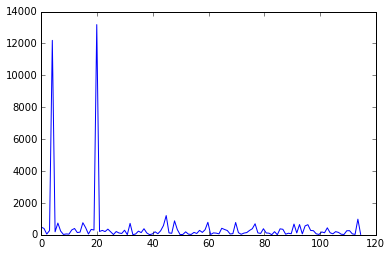

Expected Frequencies: 4, 20
Calculated Frequencies: 19.91304347826087, 3.9826086956521745


In [16]:
magnitude = abs(np.fft.rfft(sine))**2
frequencies = np.fft.rfftfreq(sine.size,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_two_freqs((freq_1,freq_2), frequencies, magnitude)

## Zero-padding and windowing before calculating the PSD

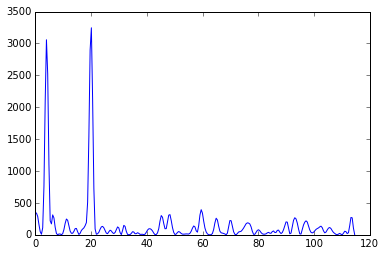

Expected Frequencies: 4, 20
Calculated Frequencies: 20.126953125, 4.025390625


In [17]:
N = int(np.ceil(np.log2(sine.size)))
pad_len = 2 ** (N + 1)
window = signal.hann(sine.size)
magnitude = abs(np.fft.rfft(sine * window, n=pad_len))**2
frequencies = np.fft.rfftfreq(pad_len,d=timestep)

plt.plot(frequencies,magnitude)
plt.show()
print_two_freqs((freq_1,freq_2), frequencies, magnitude)